In [1]:
import pandas as pd 
from typing import List, Any
import numpy as np 
from scipy.stats import chi2_contingency

# PART 1
### Data Importing

In [2]:
votes_df = pd.read_csv("./data/tabulatedVotes.csv")
print(votes_df.shape)
votes_df.columns

(1471, 27)


Index(['Unnamed: 0', 'A', 'D', 'F', 'H', 'N', 'S', 'fileName', 'numResponses',
       'agreement', 'emoVote', 'meanEmoResp', 'meanAngerResp',
       'meanDisgustResp', 'meanFearResp', 'meanHappyResp', 'meanNeutralResp',
       'meanSadResp', 'medianEmoResp', 'meanEmoRespNorm', 'meanAngerRespNorm',
       'meanDisgustRespNorm', 'meanFearRespNorm', 'meanHappyRespNorm',
       'meanNeutralRespNorm', 'meanSadRespNorm', 'medianEmoRespNorm'],
      dtype='object')

### Fleiss Kappa function

In [10]:
def calculate_fleiss_kappa(df: pd.DataFrame, categories: List[str], N: int) -> float:
    """
    Calculate Fleiss' kappa for inter-rater reliability.

    Fleiss' kappa is a statistical measure for assessing the reliability of agreement between a fixed number
    of raters when assigning categorical ratings to a number of items.

    Parameters:
    votes_df (pd.DataFrame): A DataFrame containing the rating data.
    rating_columns (List[str]): A list of column names in the DataFrame that contain the ratings.
    N (int): The total number of items rated.

    Returns:
    float: The calculated Fleiss' kappa score.
    """
    
    if len(df) <= 0:
        raise ValueError("The dataset must contain at least one item.")
    
    n = df[categories].sum(axis=1).iloc[0]  
    
    category_proportions = df[categories].sum() / (N * n)
    agreement_proportions = df[categories].apply(lambda x: (x * (x - 1)).sum(), axis=1) / (n * (n - 1))
    
    P_o = agreement_proportions.mean()
    P_e = (category_proportions ** 2).sum()
    
    kappa = (P_o - P_e) / (1 - P_e)
    
    return kappa


In [11]:
kappa_score = calculate_fleiss_kappa(votes_df, ['A', 'D', 'F', 'H', 'N', 'S'], N=len(votes_df))
print(f"Fleiss' kappa: {kappa_score:.4f}")

Fleiss' kappa: 0.4803


# Part 2

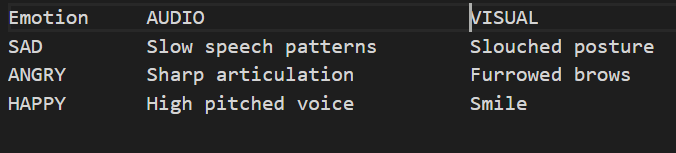

# PART 3 

SAD audio gesture: Slow speech patterns 

HAPPY audio gesture: High pitched voice

### DATA IMPORTING

In [5]:
emotions_df = pd.read_csv('./data/emotion_annotations.csv')
emotions_df = emotions_df[['video_title','High Pitch','Quiet speech']]
emotions_df.columns

Index(['video_title', 'High Pitch', 'Quiet speech'], dtype='object')

### Data Preparation 


In [6]:
emotions_df['HAPPY'] = emotions_df['video_title'].apply(lambda x: 'HAP' in x)
emotions_df['SAD'] = emotions_df['video_title'].apply(lambda x: 'SAD' in x)
emotions_df['High Pitch'] = emotions_df['High Pitch'] == 'T'
emotions_df['Quiet speech'] = emotions_df['Quiet speech'] == 'T'

Pass in contingency table to scipy function

In [7]:
chi2_stat_happy_high, p_val_happy_high, dof_happy_high, ex_happy_high = chi2_contingency(pd.crosstab(emotions_df['HAPPY'], emotions_df['High Pitch']))

chi2_stat_sad_quiet, p_val_sad_quiet, dof_sad_quiet, ex_sad_quiet = chi2_contingency( pd.crosstab(emotions_df['SAD'], emotions_df['Quiet speech']))

print(f"Chi-Squared statistic for 'High Pitch' HAPPY vs not-HAPPY: {chi2_stat_happy_high}, P-value: {p_val_happy_high}")
print(f"Chi-Squared statistic for 'Quiet speech' SAD vs not-SAD: {chi2_stat_sad_quiet}, P-value: {p_val_sad_quiet}")

Chi-Squared statistic for 'High Pitch' HAPPY vs not-HAPPY: 4.94949494949495, P-value: 0.026098291541307085
Chi-Squared statistic for 'Quiet speech' SAD vs not-SAD: 5.104166666666666, P-value: 0.023868442164574358


In [12]:
pd.crosstab(emotions_df['HAPPY'], emotions_df['High Pitch'])

High Pitch,False,True
HAPPY,,
False,15,5
True,7,13


In [13]:
pd.crosstab(emotions_df['SAD'], emotions_df['Quiet speech'])

Quiet speech,False,True
SAD,,
False,16,4
True,8,12
